In [1]:
#imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

sys.path.append('D:\pycharm_workspace\multiplex\MuNeG')
import graph.analyser.StatisticalAnalysis as sa
from pandas.core.frame import DataFrame

C:\Users\Adrian\Anaconda2\lib\site-packages\requests\packages\urllib3\connection.py:337: SubjectAltNameWarning: Certificate for api.plot.ly has no `subjectAltName`, falling back to check for a `commonName` for now. This feature is being removed by major browsers and deprecated by RFC 2818. (See https://github.com/shazow/urllib3/issues/497 for details.)
  SubjectAltNameWarning


In [4]:
cursor = sa.connect_to_data("localhost", "DanioRerio", "Adrian", "A;dek.89")
cursor.execute('select avg(fusion_sum), avg(fusion_mean), homogenity, real_homogenity from [DanioRerio].[muneg].[results_df] group by homogenity, real_homogenity')
results = cursor.fetchall()

In [5]:
fusion_sum  = [row[0] for row in results]
fusion_mean = [row[1] for row in results]
homogenity = [row[2] for row in results]
real_homogenity = [row[3] for row in results]


res_dict = []
res_dict.append(("fusion_sum", fusion_sum))
res_dict.append(("fusion_mean", fusion_mean))
res_dict.append(("homogenity", homogenity))
res_dict.append(("real_homogenity", real_homogenity))
df =  DataFrame.from_items(res_dict)
df_pivoted = df.pivot("homogenity", "real_homogenity", "fusion_sum")

In [6]:
fig, ax = plt.subplots()
ax = sns.heatmap(df_pivoted, yticklabels=2)

In [7]:
plt.show()

In [9]:
cursor = sa.connect_to_data("localhost", "DanioRerio", "Adrian", "A;dek.89")
cursor.execute('select fusion_sum, fusion_mean, fusion_layer, fusion_random, fusion_conv_max, fusion_conv_min, homogenity, baseline, reduction, real_homogenity from [DanioRerio].[muneg].[results_df]')
results = cursor.fetchall()

In [14]:
fusion_sum = [row[0] for row in results]
fusion_mean = [row[1] for row in results]
fusion_layer = [row[2] for row in results]
fusion_random = [row[3] for row in results]
fusion_conv_max = [row[4] for row in results]
fusion_conv_min = [row[5] for row in results]
homogenity = [row[6] for row in results]
baseline = [row[7] for row in results]
reduction = [row[8] for row in results]
real_homogenity = [row[9] for row in results]

homogenity = [int(elem*10) for elem in homogenity]
homogenity = sorted(homogenity)

res_dict = []
res_dict.append(("SF", fusion_sum))
res_dict.append(("MF", fusion_mean))
res_dict.append(("LF", fusion_layer))
res_dict.append(("RF", fusion_random))
res_dict.append(("SCF", fusion_conv_max))
res_dict.append(("FCF", fusion_conv_min))
res_dict.append(("homogenity", homogenity))
res_dict.append(("baseline", baseline))
res_dict.append(("LR", reduction))
res_dict.append(("real_homogenity", real_homogenity))
df = DataFrame.from_items(res_dict)

In [15]:
palette = sns.crayon_palette(['Almond', 'Aquamarine', 'Beaver', 'Blue', 'Copper',  'Vivid Tangerine', 'Magenta', 'Periwinkle','Salmon', 'Sepia', 'Tropical Rain Forest'])
palette = sns.color_palette("hls", 11)
rc={'axes.labelsize': 15, 'xtick.labelsize': 15, 'ytick.labelsize': 15}
sns.set(rc=rc)

In [17]:
g = sns.PairGrid(df, y_vars=["baseline", "real_homogenity"], x_vars=["LR", "SF", "MF", "LF", "RF", "SCF", "FCF"], hue="homogenity", palette=palette)
# g.map_diag(plt.hist)
g.map(plt.scatter)

In [120]:
print g._legend_out

True


In [18]:
legend = plt.legend(bbox_to_anchor=(-5.5, 2.20, -3., -1.102), loc=3,
           ncol=11, borderaxespad=0.,
            frameon=True, fontsize="large", title="Homogenity[%]")
for elem in legend.legendHandles:
    elem._sizes = [130]
plt.setp(legend.get_title(),fontsize='large')
plt.show()

In [109]:
cursor = sa.connect_to_data("156.17.131.228", "DanioRerio", "apopiel", "alamakota123")
cursor.execute('select prob_in, real_homogenity, fusion_sum, fusion_mean, fusion_layer, reduction from [DanioRerio].[muneg].[results_df]')
results = cursor.fetchall()

In [29]:
prob_in  = [row[0] for row in results]
real_homogenity = [row[1] for row in results]
fusion_sum = [row[2] for row in results]
fusion_mean = [row[3] for row in results]
fusion_layer = [row[4] for row in results]
reduction = [row[5] for row in results]

res_dict = []
res_dict.append(("prob_in", prob_in))
res_dict.append(("real_homogenity", real_homogenity))
res_dict.append(("fusion_sum", fusion_sum))
res_dict.append(("fusion_mean", fusion_mean))
res_dict.append(("fusion_layer", fusion_layer))
res_dict.append(("reduction", reduction))
df = DataFrame.from_items(res_dict)

In [30]:
g = sns.FacetGrid(df, col="prob_in", ylim=(0, 1))
g.map(plt.scatter, "real_homogenity", "reduction");

In [18]:
print df

        prob_in  real_homogenity  fusion_sum  fusion_mean  fusion_layer
0             5         1.000000        1.00         1.00          1.00
1             5         1.000000        1.00         1.00          1.00
2             5         1.000000        1.00         1.00          1.00
3             5         1.000000        1.00         1.00          1.00
4             5         1.000000        1.00         1.00          1.00
5             5         1.000000        1.00         1.00          1.00
6             5         1.000000        1.00         1.00          1.00
7             5         1.000000        1.00         1.00          1.00
8             5         1.000000        1.00         1.00          1.00
9             5         1.000000        1.00         1.00          1.00
10            5         1.000000        1.00         1.00          1.00
11            5         1.000000        1.00         1.00          1.00
12            5         1.000000        1.00         1.00       

In [31]:
plt.show()

In [20]:
cursor = sa.connect_to_data("156.17.131.228", "DanioRerio", "apopiel", "alamakota123")
cursor.execute('select reduction, fusion_sum, fusion_mean, fusion_layer, fusion_random, fusion_conv_max, fusion_conv_min from [DanioRerio].[muneg].[results_df]')
results = cursor.fetchall()

In [21]:
reduction  = [row[0] for row in results]
fusion_sum = [row[1] for row in results]
fusion_mean = [row[2] for row in results]
fusion_layer = [row[3] for row in results]
fusion_random = [row[4] for row in results]
fusion_conv_max = [row[5] for row in results]
fusion_conv_min = [row[6] for row in results]

res_dict = []
res_dict.append(("reduction", reduction))
res_dict.append(("fusion_sum", fusion_sum))
res_dict.append(("fusion_mean", fusion_mean))
res_dict.append(("fusion_layer", fusion_layer))
res_dict.append(("fusion_random", fusion_random))
res_dict.append(("fusion_conv_max", fusion_conv_max))
res_dict.append(("fusion_conv_min", fusion_conv_min))
df = DataFrame.from_items(res_dict)

In [22]:
g = sns.PairGrid(df)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

In [23]:
plt.show()

In [19]:
cursor = sa.connect_to_data("localhost", "DanioRerio", "Adrian", "A;dek.89")
cursor.execute('(select \'reduction\', fold, avg(reduction) from  [DanioRerio].[muneg].[results_df] group by fold ) union all (select \'fusion_sum\', fold, avg(fusion_sum) from  [DanioRerio].[muneg].[results_df] group by fold) union all  (select \'fusion_mean\', fold, avg(fusion_mean) from  [DanioRerio].[muneg].[results_df] group by fold) union all (select \'fusion_layer\', fold, avg(fusion_layer) from  [DanioRerio].[muneg].[results_df] group by fold) union all (select \'fusion_random\', fold, avg(fusion_random) from  [DanioRerio].[muneg].[results_df] group by fold) union all  (select \'fusion_conv_max\', fold, avg(fusion_conv_max) from  [DanioRerio].[muneg].[results_df] group by fold) union all  (select \'fusion_conv_min\', fold, avg(fusion_conv_min) from  [DanioRerio].[muneg].[results_df] group by fold);')
results = cursor.fetchall()

In [13]:
print df

            methods  fold   average
0         reduction    50  0.572767
1         reduction    66  0.573461
2         reduction    75  0.573810
3         reduction    80  0.573951
4         reduction    90  0.574614
5         reduction    95  0.574242
6        fusion_sum    50  0.647960
7        fusion_sum    66  0.653253
8        fusion_sum    75  0.655986
9        fusion_sum    80  0.656903
10       fusion_sum    90  0.657927
11       fusion_sum    95  0.657635
12      fusion_mean    50  0.645327
13      fusion_mean    66  0.650437
14      fusion_mean    75  0.653152
15      fusion_mean    80  0.653995
16      fusion_mean    90  0.654829
17      fusion_mean    95  0.654610
18     fusion_layer    50  0.646955
19     fusion_layer    66  0.651850
20     fusion_layer    75  0.654256
21     fusion_layer    80  0.655366
22     fusion_layer    90  0.656291
23     fusion_layer    95  0.655996
24    fusion_random    50  0.637604
25    fusion_random    66  0.641539
26    fusion_random    75  0

In [26]:
methods = [row[0] for row in  results]
fold  = [row[1] for row in results]
average = [row[2] for row in results]

percent_known = {2 : 50, 3: 66, 4: 75, 5: 80, 10:90, 20:95}
percent_from_folds = [percent_known[f] for f in fold]

res_dict = []
res_dict.append(("methods", methods))
res_dict.append(("fold", percent_from_folds))
res_dict.append(("average", average))
df = DataFrame.from_items(res_dict)

In [27]:
rc={'axes.labelsize': 19, 'xtick.labelsize': 19, 'ytick.labelsize': 19, 'xtick.major.width':1205}
sns.set(rc=rc)
g = sns.factorplot(legend=True, legend_out=True, x="methods", y="average", col="fold", data=df,col_wrap=3,  kind="bar")
g.set_axis_labels("", "Average F1-Score")\
    .set_xticklabels(["LR", "SF", "MF", "LF", "RF", "SCF", "FCF"], rotation=90)\
    .set_titles("Known nodes: {col_name}% ")\
    .set(ylim=(0.56, 0.66))

In [28]:
plt.gcf().subplots_adjust(bottom=0.20)
plt.show()

In [25]:
cursor = sa.connect_to_data("localhost", "DanioRerio", "Adrian", "A;dek.89")
cursor.execute('(select \'reduction\', fold, avg(reduction) from  [DanioRerio].[daniorerio].[results_df] group by fold ) union all (select \'fusion_sum\', fold, avg(fusion_sum) from  [DanioRerio].[daniorerio].[results_df] group by fold) union all  (select \'fusion_mean\', fold, avg(fusion_mean) from  [DanioRerio].[daniorerio].[results_df] group by fold) union all (select \'fusion_layer\', fold, avg(fusion_layer) from  [DanioRerio].[daniorerio].[results_df] group by fold) union all (select \'fusion_random\', fold, avg(fusion_random) from  [DanioRerio].[daniorerio].[results_df] group by fold) union all  (select \'fusion_conv_max\', fold, avg(fusion_conv_max) from  [DanioRerio].[daniorerio].[results_df] group by fold) union all  (select \'fusion_conv_min\', fold, avg(fusion_conv_min) from  [DanioRerio].[daniorerio].[results_df] group by fold);')
results = cursor.fetchall()

In [3]:
import scipy.stats as stats
import graph.analyser.nemenyi as nemenyi

In [7]:
cursor = sa.connect_to_data("localhost", "DanioRerio", "Adrian", "A;dek.89")
cursor.execute('select reduction, fusion_sum, fusion_mean, fusion_layer, fusion_random, fusion_conv_max, fusion_conv_min from DanioRerio.muneg.results_df')
results = cursor.fetchall()

In [8]:
reduction = [row[0] for row in  results]
fusion_sum  = [row[1] for row in results]
fusion_mean = [row[2] for row in results]
fusion_layer = [row[3] for row in results]
fusion_random = [row[4] for row in results]
fusion_conv_max = [row[5] for row in results]
fusion_conv_min = [row[6] for row in results]

In [9]:
groups = [reduction, fusion_sum, fusion_mean, fusion_layer, fusion_random, fusion_conv_max, fusion_conv_min ]
friedman_res = stats.friedmanchisquare(reduction, fusion_sum, fusion_mean, fusion_layer, fusion_random, fusion_conv_max, fusion_conv_min)

print friedman_res
nemenyi.kw_nemenyi(groups,
                   method="tukey",
                   to_compare=[(0,1), (0,2), (0,3), (0,4), (0,5), (0,6)])

FriedmanchisquareResult(statistic=73947.731562914312, pvalue=0.0)


(37438.495294830012,
 0.0,
 array([ 0.001,  0.001,  0.001,  0.001,  0.001,  0.001]),
 array([ True,  True,  True,  True,  True,  True], dtype=bool))

In [17]:
cursor = sa.connect_to_data("localhost", "DanioRerio", "Adrian", "A;dek.89")
cursor.execute('select TOP (1000) reduction, fusion_sum, fusion_mean, fusion_layer, fusion_random, fusion_conv_max, fusion_conv_min from DanioRerio.DANIORERIO.results_df')
results = cursor.fetchall()

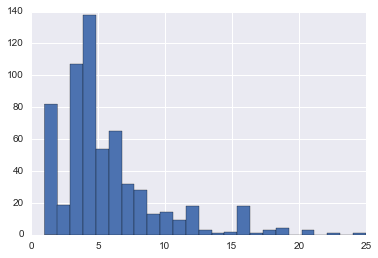

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
output = pd.read_csv('D:\\pycharm_workspace\\multiplex\\MuNeG\\results\\iterations\\output.csv')
output['iter'].hist(bins=25)

In [2]:
import pandas as pd

frame = pd.DataFrame()
output = pd.read_csv('D:\\pycharm_workspace\\multiplex\\MuNeG\\results\\real\\aoc\\combined.csv',index_col=None, header=0)
homogenity_output = pd.read_csv('D:\\pycharm_workspace\\multiplex\\MuNeG\\results\\real\\real_baseline.csv')
output_with_homogenity = pd.merge(output, homogenity_output,on="function")

In [3]:
mean_homogenity =  output_with_homogenity.groupby(["method","homogenity"],squeeze=True).mean().reset_index()

In [13]:
output2 = pd.read_csv('D:\\pycharm_workspace\\multiplex\\MuNeG\\results\\real_sw\\aoc\\combined.csv',index_col=None, header=0)
homogenity_output_sw = pd.read_csv('D:\\pycharm_workspace\\multiplex\\MuNeG\\results\\real_sw\\real_baseline.csv')
sw_with_homogenity = pd.merge(output2, homogenity_output_sw,on="experiment")
mean_homogenity_sw =  sw_with_homogenity.groupby(["method","homogenity"],squeeze=True).mean().reset_index()

In [14]:
mean_homogenity["dataset"] = "daniorerio"
mean_homogenity_sw["dataset"] = "starwars"
print mean_homogenity_sw

                    method  homogenity      fold       auc  repetition  \
0   fusion_convergence_max    0.732105  7.333333  0.720777           1   
1   fusion_convergence_max    0.742046  7.333333  0.700507           1   
2   fusion_convergence_max    0.776557  7.333333  0.676910           1   
3   fusion_convergence_min    0.732105  7.333333  0.937666           1   
4   fusion_convergence_min    0.742046  7.333333  0.922097           1   
5   fusion_convergence_min    0.776557  7.333333  0.943318           1   
6             fusion_layer    0.732105  7.333333  0.710214           1   
7             fusion_layer    0.742046  7.333333  0.681494           1   
8             fusion_layer    0.776557  7.333333  0.662924           1   
9              fusion_mean    0.732105  7.333333  0.993038           1   
10             fusion_mean    0.742046  7.333333  0.999189           1   
11             fusion_mean    0.776557  7.333333  0.999278           1   
12           fusion_random    0.732105

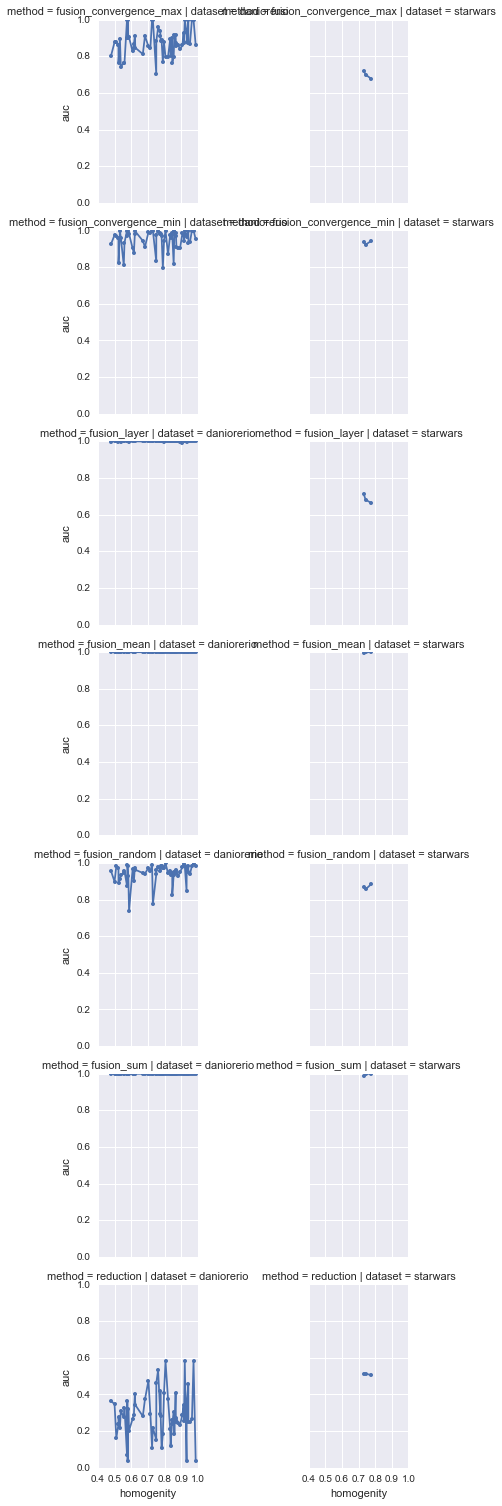

In [26]:
# frames = [mean_homogenity, sw_with_homogenity]
result = mean_homogenity.append(mean_homogenity_sw)
# result
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
grid = sns.FacetGrid(result,row="method",col="dataset")
grid.map(plt.plot, "homogenity", "auc", marker="o", ms=4)
grid.savefig("D:\\pycharm_workspace\\multiplex\\MuNeG\\results\\homogenity.png")

In [28]:
target_file = open('D:\\pycharm_workspace\\multiplex\\MuNeG\\results\\real\\aoc\\output.txt','ab')
import pickle
pickle.dump(frame, target_file)

In [13]:
import pandas as pd

frame = pd.DataFrame()
frame = pd.read_csv('D:\\pycharm_workspace\\multiplex\\MuNeG\\results\\real\\tsplot\\output_30.csv',index_col=None, header=0)

In [7]:
output
output = output.fillna(0)

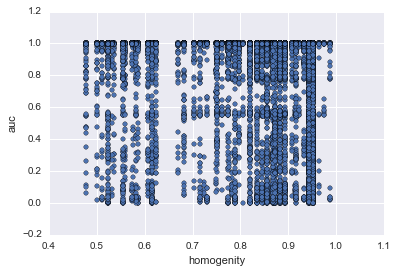

In [16]:
%matplotlib inline
output_with_homogenity.plot(x="homogenity", y="auc", kind="scatter")

fusion_convergence_max


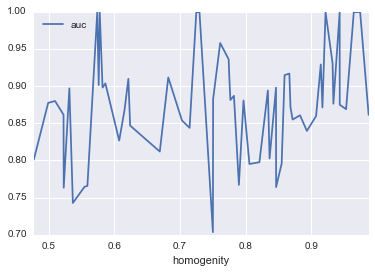

fusion_convergence_min


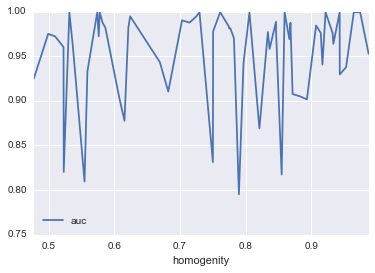

fusion_layer


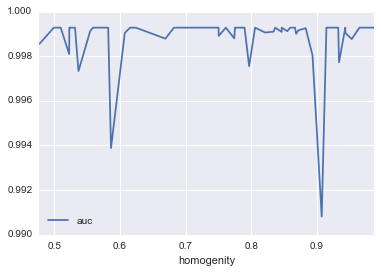

fusion_mean


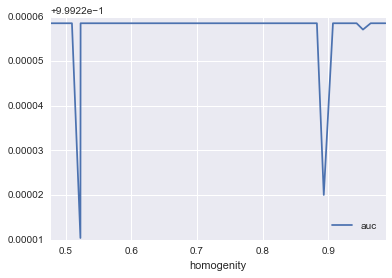

fusion_random


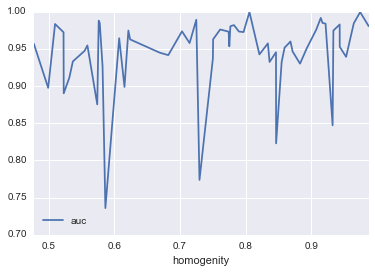

fusion_sum


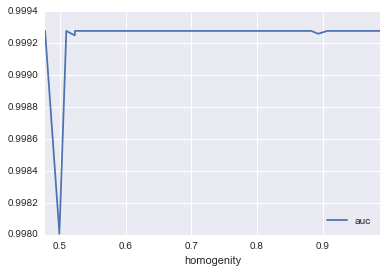

reduction


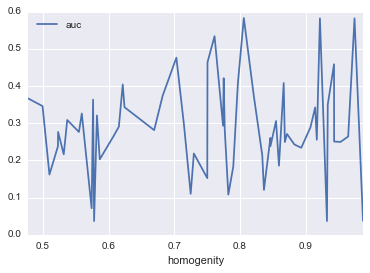

In [43]:
import matplotlib.pyplot as plt
for method in mean_homogenity["method"].unique():
    mean_homogenity[mean_homogenity["method"]==method].plot(x="homogenity", y="auc", kind="line")
    print method
    plt.show()

In [20]:
import seaborn as sns
gammas = sns.load_dataset("gammas")

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid", rc={"lines.linewidth":16})

figure = plt.figure()
colors = ['cyan','indigo','seagreen','yellow','blue','darkorange',"red"]
ax = sns.tsplot(time="fprs", value="tprs", unit="fold", condition="method", data=frame, color=colors)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize="20")
plt.ylabel('True Positive Rate', fontsize="20")
plt.xticks(fontsize="20")
plt.yticks(fontsize="20")
plt.title('Receiver operating characteristic for repetitions', fontsize="25")

legend = plt.legend(loc="lower right", fontsize="17", frameon=True)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
# 
figure.set_size_inches(19, 12)
figure.savefig('D:\\pycharm_workspace\\multiplex\\MuNeG\\results\\real\\tsplot\\real_tsplot_30.png', dpi=300)
plt.close(figure)

In [2]:
#SYNTHETIC NEW LBP ANALYSIS
import pandas as pd
import seaborn as sns
%matplotlib inline
frame = pd.DataFrame()
frame = pd.read_csv('D:\\pycharm_workspace\\multiplex\\MuNeG\\results\\synthetic\\aoc\\new_lbp_combined.csv',index_col=None, header=0)
output = frame.fillna(0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001C5C5128>]], dtype=object)

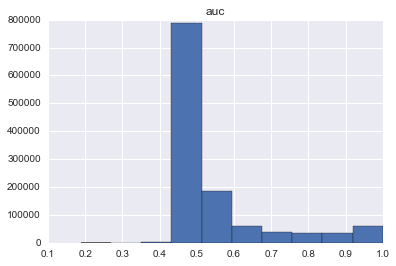

In [34]:
output.hist("auc")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000039200828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000003A7CB550>]], dtype=object)

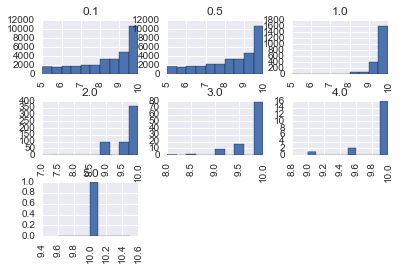

In [78]:
output.loc[(output["auc"] >= 0.9) ].hist("gen_homophilly","prob_out")